In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import random
import os
from sklearn.feature_selection import SelectPercentile
from tqdm import tqdm, tqdm_notebook
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, ShuffleSplit


# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
#matplotlib 한글깨짐 지원
import platform

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# LGBM Regressor
from lightgbm import LGBMRegressor

In [10]:
X_train = pd.read_csv('/content/drive/MyDrive/감귤착과량공모전/data/X_train_scale.csv')
X_test = pd.read_csv('/content/drive/MyDrive/감귤착과량공모전/data/X_test_scale.csv')

In [11]:
y_train = pd.read_csv('/content/drive/MyDrive/감귤착과량공모전/data/train.csv')
y_train = y_train['착과량(int)']

In [12]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [13]:
def NMAE_CV(clf, x, y):
    pred = clf.predict(x)
    mae = np.mean(np.abs(y - pred))
    score = mae / np.mean(np.abs(y))
    return score

<ipython-input-7-536a3b0eccf1>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for p in tqdm_notebook(range(5,100,1)):


  0%|          | 0/95 [00:00<?, ?it/s]

(13, 0.08020030297535899)


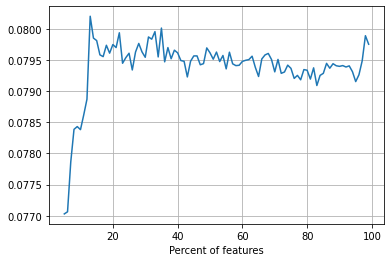

<ipython-input-14-536a3b0eccf1>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for p in tqdm_notebook(range(5,100,1)):


  0%|          | 0/95 [00:00<?, ?it/s]

(13, 0.08020030297535899)


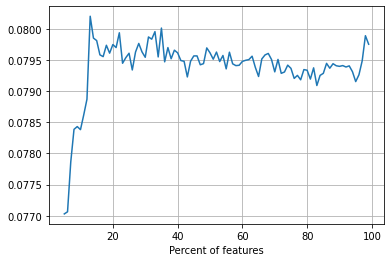

In [14]:
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장). 다른 모델 가능
model = LGBMRegressor(objective="regression", metric="mae", random_state=22)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm_notebook(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_train)
    sscv = ShuffleSplit(test_size=.3, n_splits=10, random_state=22)    
    cv_score = cross_val_score(model, X_new, y_train, scoring=NMAE_CV, cv=sscv).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

#### -  p가 13일때 가장 성능이 좋았음

In [15]:
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [19]:
X_train.to_csv('X_train_fine.csv', index = False)
X_test.to_csv('X_test_fine.csv', index = False)